In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all = pd.read_csv("data/cbb_24-25_allpower5.csv")
all = all.rename(columns={"MPâ¼": "MP"})
all["TS%"] = all["PTS"]/(2 * (all["FGA"] + 0.475 * all["FTA"]))
all.columns
all["FGA/40"] = all["FGA"]/all["MP"] * 40
all.head(800)

,Rk,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Awards,Conference,TS%,FGA/40
0,1.0,Braden Smith,Purdue,G,36.0,36.0,1333.0,202.0,472.0,0.428,...,313.0,78.0,7.0,109.0,61.0,567.0,"AA-1,AP-AA-1,NABC-AA-1,SN-AA-1,USBWA-AA-1,W-AA-1",cbb_23-24_b10_min200min_allstats,0.547720,14.163541
1,2.0,Nick Martinelli,Northwestern,F,33.0,33.0,1242.0,251.0,533.0,0.471,...,57.0,24.0,8.0,66.0,77.0,676.0,NaN,cbb_23-24_b10_min200min_allstats,0.540260,17.165862
2,3.0,Brice Williams,Nebraska,G,35.0,35.0,1192.0,228.0,484.0,0.471,...,100.0,38.0,10.0,83.0,63.0,713.0,NaN,cbb_23-24_b10_min200min_allstats,0.608725,16.241611
3,4.0,Saint Thomas,Southern California,F,35.0,35.0,1185.0,134.0,288.0,0.465,...,147.0,47.0,16.0,83.0,84.0,333.0,NaN,cbb_23-24_b10_min200min_allstats,0.526066,9.721519
4,5.0,Bruce Thornton,Ohio State,G,32.0,32.0,1157.0,187.0,373.0,0.501,...,148.0,35.0,4.0,47.0,49.0,566.0,NaN,cbb_23-24_b10_min200min_allstats,0.632968,12.895419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,97.0,Sadiku Ibine Ayo,St. John's (NY),F,31.0,2.0,248.0,20.0,58.0,0.345,...,9.0,6.0,5.0,7.0,21.0,58.0,NaN,cbb_23-24_east_min200min_allstats,0.469256,9.354839
737,98.0,Vincent Iwuchukwu,St. John's (NY),F,34.0,1.0,243.0,39.0,72.0,0.542,...,5.0,4.0,17.0,12.0,34.0,91.0,NaN,cbb_23-24_east_min200min_allstats,0.564867,11.851852
738,99.0,Justyn Fernandez,Providence,G,24.0,4.0,242.0,31.0,77.0,0.403,...,9.0,6.0,4.0,11.0,17.0,87.0,NaN,cbb_23-24_east_min200min_allstats,0.544771,12.727273
739,100.0,Gus Yalden,Seton Hall,F,26.0,0.0,218.0,18.0,49.0,0.367,...,8.0,7.0,5.0,8.0,41.0,46.0,NaN,cbb_23-24_east_min200min_allstats,0.406360,8.990826


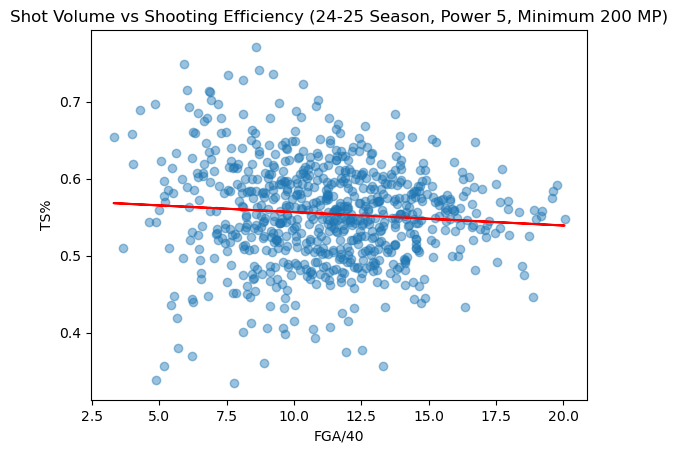

In [4]:
x = all["FGA/40"]
y = all["TS%"]

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y, alpha=0.45)
plt.plot(x, m*x + b, color='red')
plt.xlabel("FGA/40")
plt.ylabel("TS%")
plt.title("Shot Volume vs Shooting Efficiency (24-25 Season, Power 5, Minimum 200 MP)")
plt.show()

In [136]:
all["FGA/40"].corr(all["TS%"])

-0.08158535015206737

In [137]:
eff_high_vol = all[(all["FGA/40"] > 15) & (all["TS%"] > 0.58)]
eff_high_vol[["Player", "Team", "FGA/40", "TS%"]].sort_values("TS%", ascending=False)

,Player,Team,FGA/40,TS%
354,Richie Saunders,Brigham Young,15.130941,0.651110
122,Owen Freeman,Iowa,16.733068,0.647328
8,John Tonje,Wisconsin,15.256299,0.646833
550,Aden Holloway,Alabama,15.959079,0.621411
14,Trey Kaufman-Renn,Purdue,17.741644,0.611934
2,Brice Williams,Nebraska,16.241611,0.608725
485,Walter Clayton Jr.,Florida,16.490952,0.601789
215,Matthew Cleveland,Miami (FL),16.291240,0.599871
179,Cooper Flagg,Duke,17.515419,0.592636
382,JT Toppin,Texas Tech,19.755284,0.591821


In [138]:
ineff_high_vol = all[(all["FGA/40"] > 15) & (all["TS%"] < 0.50)]
ineff_high_vol[["Player", "Team", "FGA/40", "TS%"]].sort_values("TS%", ascending=False)

,Player,Team,FGA/40,TS%
102,Brooks Barnhizer,Northwestern,15.859873,0.499528
182,Jaland Lowe,Pittsburgh,16.102004,0.499184
578,Boogie Fland,Arkansas,15.172414,0.497626
28,Jaden Akins,Michigan State,17.539683,0.491803
214,JJ Starling,Syracuse,18.464961,0.487035
663,Isaiah Coleman,Seton Hall,16.712871,0.481828
373,Jizzle James,Cincinnati,18.545838,0.475024
522,Zhuric Phelps,Texas A&M,18.892508,0.446660
377,Vasean Allette,TCU,16.334405,0.433316


In [139]:
eff_low_vol = all[(all["FGA/40"] < 10) & (all["TS%"] > 0.60)]
eff_low_vol[["Player", "Team", "FGA/40", "TS%"]].sort_values("TS%", ascending=False)

,Player,Team,FGA/40,TS%
694,Samson Johnson,Connecticut,8.571429,0.770865
445,Josh Ojianwuna,Baylor,5.905097,0.749229
568,Clifford Omoruyi,Alabama,8.688293,0.740271
224,Khaman Maluach,Duke,9.227053,0.736021
161,Even Brauns,Iowa,7.543860,0.734438
...,...,...,...,...
95,C.J. Cox,Purdue,9.088191,0.606316
548,Nick Pringle,South Carolina,9.160305,0.605274
678,Troy D'Amico,DePaul,6.611570,0.603727
290,Lee Dort,California,6.440678,0.601504


In [140]:
high = all[all["FGA/40"] > 15]["TS%"].mean()
low = all[all["FGA/40"] < 10]["TS%"].mean()
high, low

(0.5530945879602246, 0.5598687288526093)

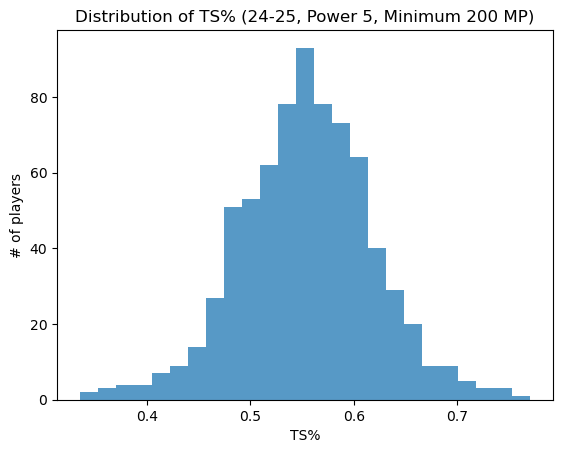

In [143]:
plt.hist(all["TS%"], bins=25, alpha=0.75)
plt.xlabel("TS%")
plt.ylabel("# of players")
plt.title("Distribution of TS% (24-25, Power 5, Minimum 200 MP)")
plt.show()